# Analysis of Katt Williams' Viral Interview

## Context
On January 3rd, an intense, often funny, and highly controversial interview featuring the comedian Katt Williams was released, quickly taking the internet by storm. Within just five days, the interview garnered a staggering 35 million views, sparking widespread discussion across various social media platforms and amongst fans and critics alike. This analysis aims to delve into the nuances of the interview, examining the frequency and context of celebrity mentions, as well as the overall thematic elements present throughout the conversation.

## Reasoning
The rationale behind this analysis is to comprehend the elements that contributed to the interview's virality. By exploring the content of the interview quantitatively, we seek to identify patterns and references that resonated with the audience. Additionally, understanding the structure and flow of the conversation can offer insights into effective communication strategies used during the interview.

## Methodology
Our analysis consists of several data science techniques, implemented in Python:

1. **Natural Language Processing (NLP)**: To extract the names of celebrities mentioned by Katt Williams and to analyze the general word usage throughout the interview transcript.

2. **Sentiment Analysis**: To gauge the emotional tone of the interview and assess how sentiment varies over time.

3. **Topic Modeling**: To uncover the underlying topics that Katt Williams discusses, using Latent Dirichlet Allocation (LDA) for different segments of the interview.

4. **Data Visualization**: To present our findings, we employ various types of graphs:
   - A **bar chart** showcasing the frequency of celebrity mentions.
   - A **word cloud** reflecting the most commonly used words after filtering out stopwords and non-meaningful words, with a color scheme adapted from the interview's setting.
   - A **time series plot** created with Plotly, illustrating the distribution of celebrity mentions throughout the interview's timeline.

The following code executes the aforementioned analysis and generates the visualizations that will be discussed in our results section.

In [13]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Basic preprocessing
df = pd.read_csv('katt_transcript.csv', header=None)
df = df.drop(columns=[0])
df.columns = ['timestamp', 'text']

# Replace every instance of 'cat' with 'Katt' in the 'text' column
df['text'] = df['text'].str.replace(r'\bcat\b', 'Katt', regex=True)

df

,timestamp,text
0,00:00:00,this is the other side of Kirk Franklin
1,00:00:02,[Applause]
2,00:00:05,prank this is the rec
3,00:00:09,2024 all my grinding all my life
4,00:00:13,sacrifice the price a slice got the roll
...,...,...
3787,02:45:52,sacrifice hle P the price want a slice
3788,02:45:56,got the roll a dice that&#39;s why all my
3789,02:45:58,life been grinding all my
3790,02:46:01,[Music]


# Frequency of Celebrity Mentions in Katt Williams Interview

This section of the analysis focuses on identifying how frequently Katt Williams mentioned various celebrities throughout the viral interview. The aim is to uncover patterns in the discussion and pinpoint the most discussed figures, providing insights into the interview's content focus.

## Methodology

The transcript text was processed using Natural Language Processing (NLP) techniques to extract proper nouns, which were then classified as celebrity names. The frequency of each identified celebrity mention was tallied to quantify their presence within the conversation.

A bar chart was created to visualize the frequency of mentions. The chart gives a clear, visual representation of which celebrities were mentioned most often, providing a quantifiable measure of the interview's celebrity-centric discussions.

## Observations

Katt mentioned quite a few people in this interview. I decided to keep "it's" and "he's" in the graph because when he says those words, he's generally using them to speak about someone.

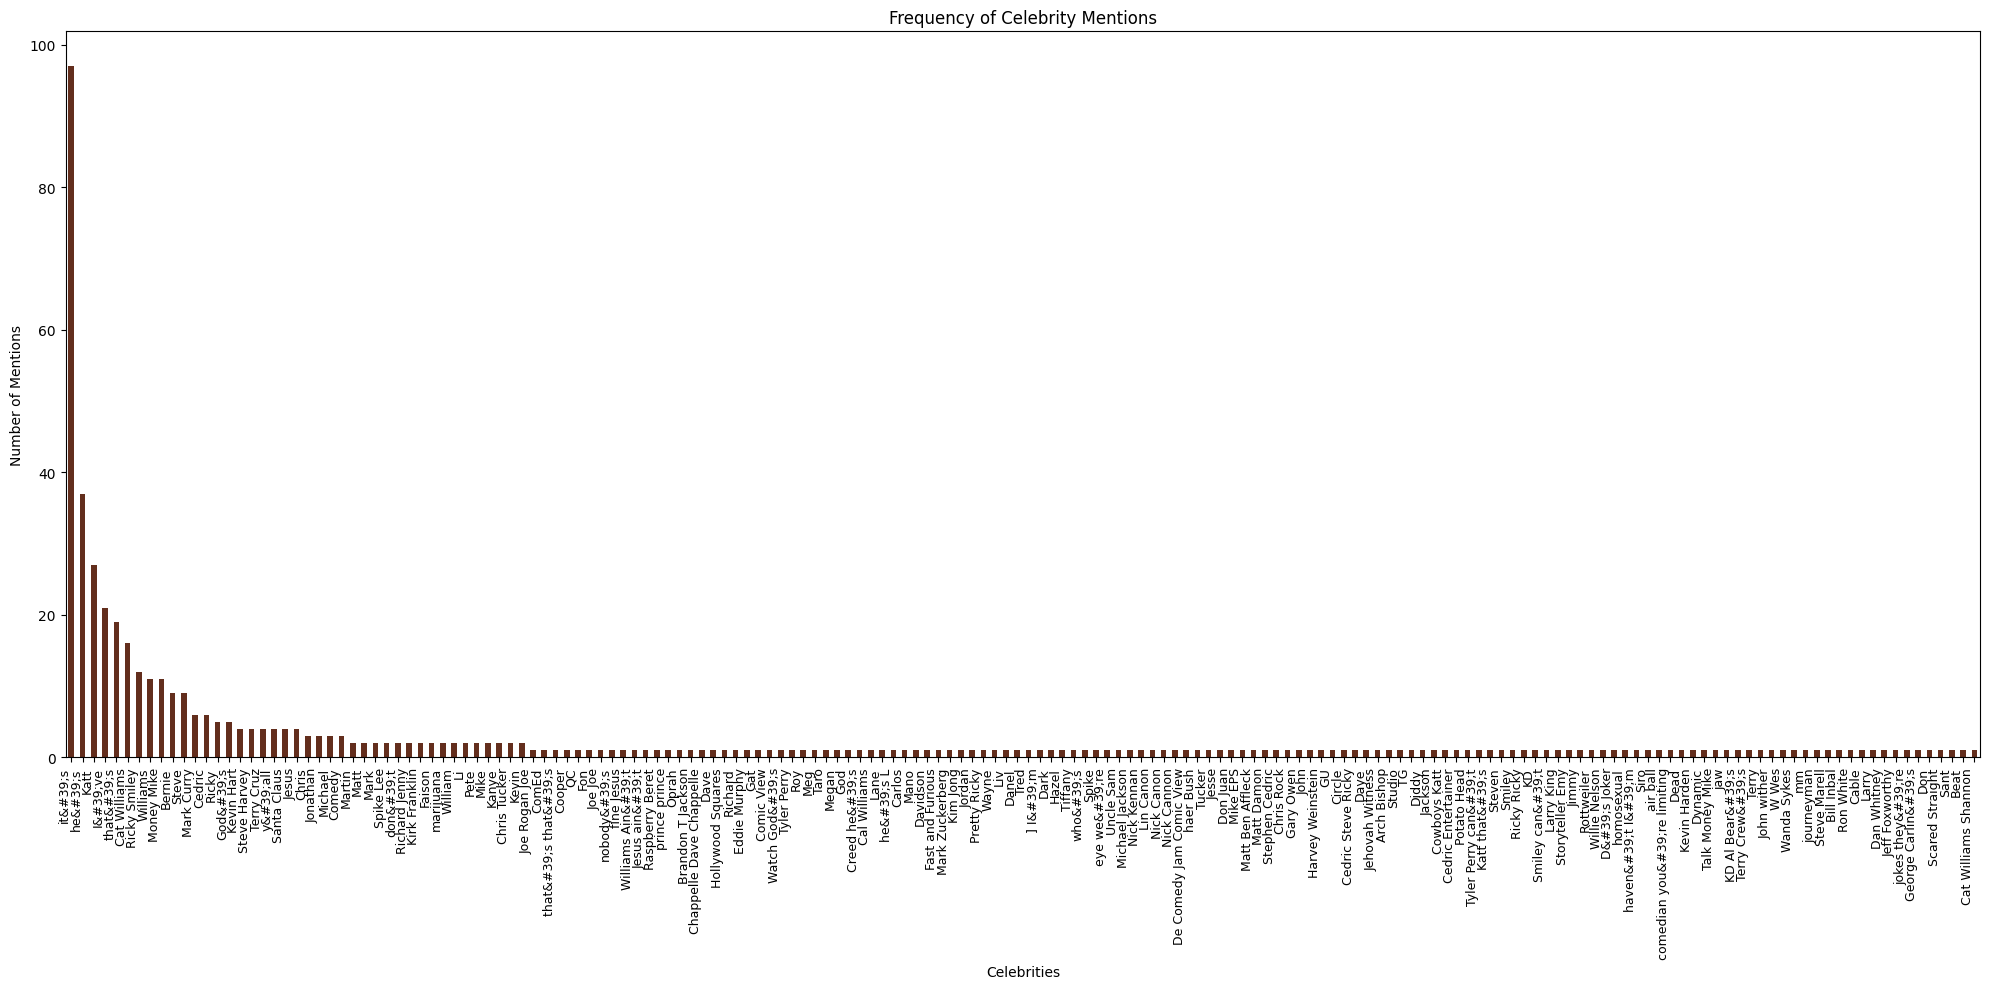

In [14]:
dark_color = '#632e1d'
light_color = '#dcd0c0'

# Load a pre-trained NER model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to identify and extract celebrity names
def extract_celebrity_names(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# Apply the function to the 'text' column
df['celebrities'] = df['text'].apply(extract_celebrity_names)

# Now, you need to parse the timestamps and calculate durations
# Assuming the timestamp format is 'HH:MM:SS'
df['timestamp_delta'] = pd.to_timedelta(df['timestamp'])

# Assuming each row in the DataFrame represents a successive timestamp
# We can calculate the duration of each mention
df['duration'] = df['timestamp_delta'].diff().fillna(pd.Timedelta(seconds=0))

# For visualization, let's create a bar chart showing the number of times each celebrity is mentioned
celebrity_mentions = df.explode('celebrities')['celebrities'].value_counts()

## Assuming celebrity_mentions is a Series or a DataFrame column
plt.figure(figsize=(20, 10))  # Increase figure size
celebrity_mentions.plot(kind='bar', color=dark_color)

plt.title('Frequency of Celebrity Mentions')
plt.xlabel('Celebrities')
plt.ylabel('Number of Mentions')

# Rotate the labels on the x-axis
plt.xticks(rotation=90, ha='right', fontsize=9) 

#celebrity_mentions.plot(kind='barh')

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

# Celebrity Mentions Over Time

In this part of the analysis, we examine the temporal distribution of celebrity mentions throughout the viral interview with Katt Williams. The objective is to observe how the conversation evolves and to detect any patterns regarding the frequency of mentions over time.

## Observations

- The chart reveals concentrated periods of discussion on specific individuals, which could correlate with significant events or topics within the interview. And we see that the peak is at the beginning, which is when he really went off.
- The graph shows a low point around the 30-minute mark, which is when Katt started explaining his home life and his childhood.


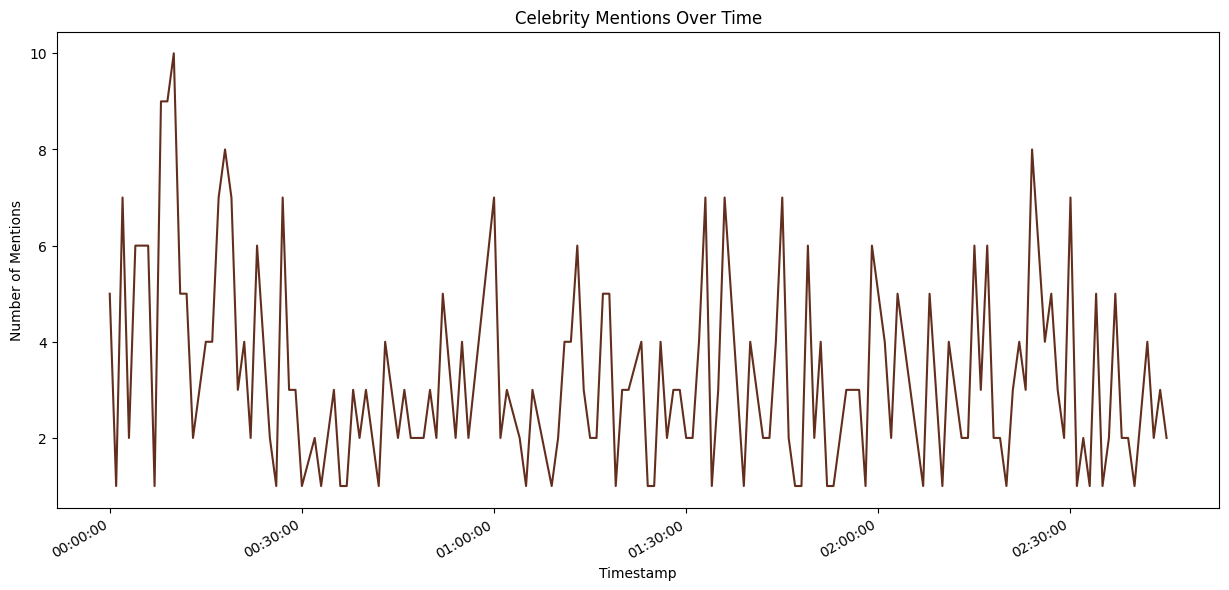

In [4]:
# Assuming 'timestamp' is the name of your column with timestamp data
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Now set the timestamp column as the index of the DataFrame
df = df.set_index('timestamp')

# Explode the 'celebrities' column so each celebrity mention is in its own row
df_exploded = df.explode('celebrities')

# Now, group by the timestamp at your desired frequency, counting celebrity mentions
# Here, 'T' stands for minute. You could use 'H' for hour, 'D' for day, etc.
# The resulting DataFrame will have a datetime index and a column with the count of mentions
mention_counts = df_exploded.groupby([pd.Grouper(freq='T'), 'celebrities']).size().unstack(fill_value=0)

# Now, sum across columns to get the total number of celebrity mentions per time period
total_mentions_per_period = mention_counts.sum(axis=1)

# Plot the time series
plt.figure(figsize=(15, 7))
total_mentions_per_period.plot(color=dark_color)

# Format the x-axis with date formatting for better readability
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate date labels to avoid overlap
plt.gcf().autofmt_xdate()

plt.title('Celebrity Mentions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Mentions')

plt.show()

# Katt's Top 20 Most Frequent Words

In the following analysis, we explore the transcript of Katt's viral interview to identify the most frequently used words. Our goal is to gain insight into the primary subjects and themes Katt focuses on during the interview.

## Code Description

The code utilizes the Natural Language Toolkit (nltk) in Python to tokenize the transcript text, allowing us to break down the content into individual words. This process includes filtering out stopwords and punctuation to ensure we focus on meaningful words.

We then count the frequency of each word and extract the top 20 for further examination.

[nltk_data] Downloading package punkt to /Users/jevans/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jevans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      word  frequency
0     like        267
1    going        148
2     know        146
3      get        140
4      got        136
5       um        119
6   people        114
7      say        109
8    right        102
9    would         97
10    yeah         94
11    want         87
12     one         87
13      go         79
14    said         71
15    mean         70
16   never         69
17    tell         67
18    time         61
19  saying         61


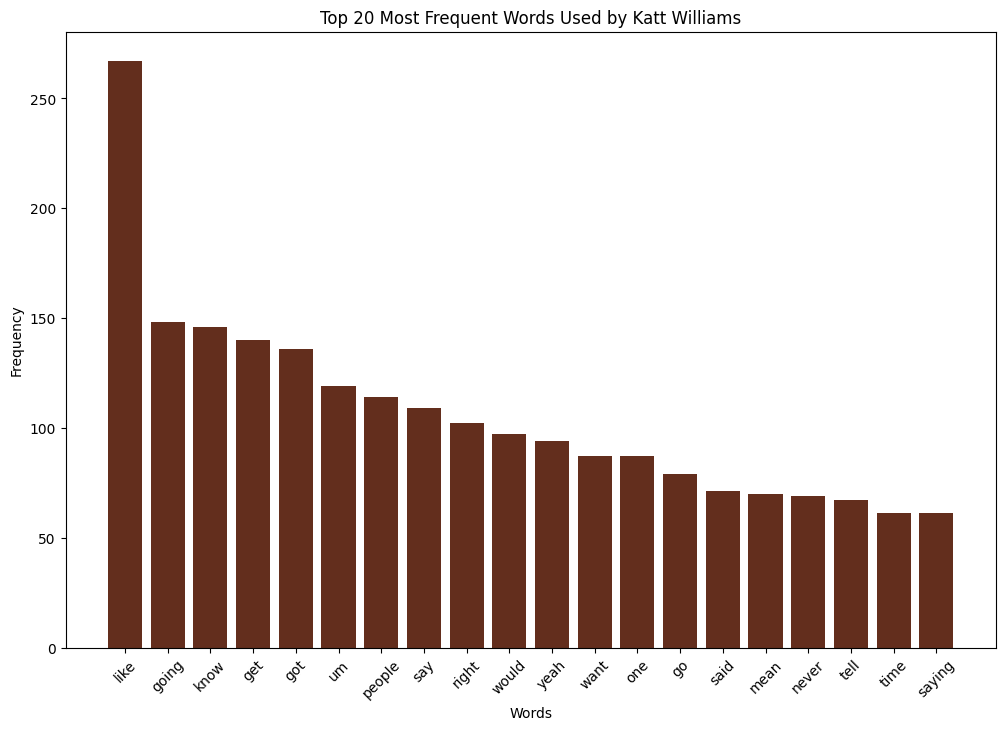

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Ensure you have the necessary nltk packages
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your DataFrame and it has a 'text' column with the transcriptions
# Combine all text into a single string
all_text = ' '.join(df['text'].dropna())

# Tokenize the text into individual words
words = word_tokenize(all_text)

# Convert words to lowercase and remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
words_cleaned = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Count the frequency of each word
word_freq = Counter(words_cleaned)

# Convert the counter object into a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Reset the index of the DataFrame
word_freq_df.reset_index(drop=True, inplace=True)

# Display the top 20 most common words
print(word_freq_df.head(20))

# Now, let's plot the top 20 most common words
plt.figure(figsize=(12, 8))
plt.bar(word_freq_df['word'][:20], word_freq_df['frequency'][:20], color=dark_color)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words Used by Katt Williams')
plt.xticks(rotation=45)
plt.show()

# Topic Modeling

The following analysis dives into the underlying themes discussed in Katt Williams' interview, which has captured significant public attention. Using Latent Dirichlet Allocation (LDA), we have identified distinct topics based on the words most frequently associated with each other within the transcript.

## Topics and Interpretation

To be honest, it's a bit difficult to find patterns within these topics. More tuning is probably necessary here, but this is a good start.

## Methodology

Each topic was generated by analyzing segments of the interview transcript. The text was preprocessed to remove common stopwords and then tokenized. The resulting tokens were used to create a bag-of-words corpus, which served as input for the LDA model.

## Code Description

The code for topic modeling utilizes the `gensim` library's implementation of LDA. The model's parameters were fine-tuned to capture the essence of the conversation, and each topic was derived from the patterns observed in the word distributions.

## Observations

The extracted topics reveal a multi-dimensional view of the interview's content. From personal reflections to broader societal commentary, Katt Williams navigates through various subjects, showcasing his storytelling ability and his perspective on different matters.

In [6]:
import pandas as pd
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have the necessary nltk packages
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your DataFrame and it has a 'text' column with the transcripts
# Tokenize the text and clean it
stop_words = set(stopwords.words('english'))

# Function to prepare the text for topic modeling
def prepare_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply the function to each document
df['tokens'] = df['text'].dropna().apply(prepare_text)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['tokens'])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert dictionary into a bag-of-words corpus for reference
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Apply LDA
lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda.print_topics(num_words=15)
for topic in topics:
    print(topic)

[nltk_data] Downloading package punkt to /Users/jevans/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jevans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.119*"I" + 0.080*"know" + 0.065*"people" + 0.038*"said" + 0.037*"got" + 0.028*"okay" + 0.022*"cuz" + 0.020*"comedy" + 0.019*"like" + 0.018*"need" + 0.017*"Williams" + 0.017*"comedians" + 0.017*"nothing" + 0.016*"take" + 0.016*"Cat"')
(1, '0.399*"I" + 0.077*"like" + 0.029*"want" + 0.024*"mean" + 0.020*"saying" + 0.018*"think" + 0.014*"um" + 0.014*"got" + 0.013*"look" + 0.013*"going" + 0.011*"understand" + 0.011*"movie" + 0.011*"good" + 0.009*"first" + 0.008*"nobody"')
(2, '0.082*"get" + 0.051*"one" + 0.033*"going" + 0.032*"life" + 0.031*"could" + 0.027*"make" + 0.020*"whole" + 0.019*"put" + 0.018*"let" + 0.017*"person" + 0.016*"somebody" + 0.016*"years" + 0.015*"sure" + 0.015*"thought" + 0.014*"play"')
(3, '0.063*"right" + 0.058*"yeah" + 0.048*"go" + 0.046*"um" + 0.039*"time" + 0.031*"really" + 0.027*"see" + 0.021*"work" + 0.021*"uh" + 0.018*"every" + 0.017*"back" + 0.017*"day" + 0.016*"talk" + 0.015*"believe" + 0.015*"still"')
(4, '0.068*"say" + 0.061*"would" + 0.044*"never" + 0.

# Word Cloud Analysis

The word cloud visualization below represents the most frequently used words by Katt Williams during his viral interview. This graphical representation highlights the dominant themes and subjects within the interview by displaying words in varying sizes; the larger the word, the more frequently it was mentioned.

## Observations

The word cloud reveals a mix of general conversational words along with potentially significant terms that could point to key topics of discussion. Words like "comedy," "black," and "movie" may reflect Katt Williams's career and industry commentary, while words like "think," "mean," and "people" suggest a more in-depth conversational context.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jevans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


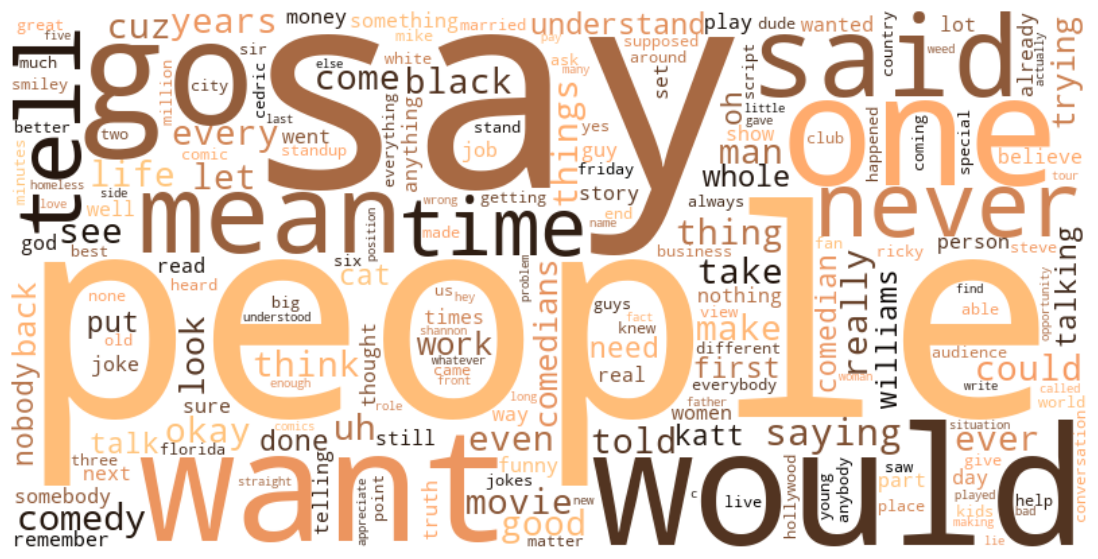

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Ensure you have the stopwords from nltk
nltk.download('stopwords')

# Get the standard list of stopwords in English
stop_words = set(stopwords.words('english'))

# Update the list with your own set of words to ignore (if necessary)
custom_stopwords = {'um', 'like', 'going', 'know', 'get', 'yeah', 'got', 'right', ...}
all_stopwords = stop_words.union(custom_stopwords)

# Convert the DataFrame to a dictionary with words as keys and frequencies as values
word_freq_dict = word_freq_df.set_index('word')['frequency'].to_dict()

# Filter out the stopwords from your word frequency dictionary
filtered_word_freq = {word: freq for word, freq in word_freq_dict.items() if word not in all_stopwords}

# Create a word cloud object
wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white', 
    colormap='copper'  # This colormap has brownish tones
).generate_from_frequencies(filtered_word_freq)

# Generate the word cloud from frequencies
wordcloud.generate_from_frequencies(filtered_word_freq)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

# Sentiment Analysis Over Time

The sentiment analysis graph provides a chronological view of the emotional tone throughout the Katt Williams interview. The sentiment score reflects the positive or negative nature of the language used, ranging from -1 (most negative) to +1 (most positive).

The graph employs a time series plot to depict the sentiment polarity scores at each timestamp, revealing the ebb and flow of the conversation's sentiment.

## Observations

Katt's sentiments were all over the place. And this makes sense. The interview went a lot of places, and sometimes Katt dished out respect, while at other times...well...he dished out a little bit of disrespect.

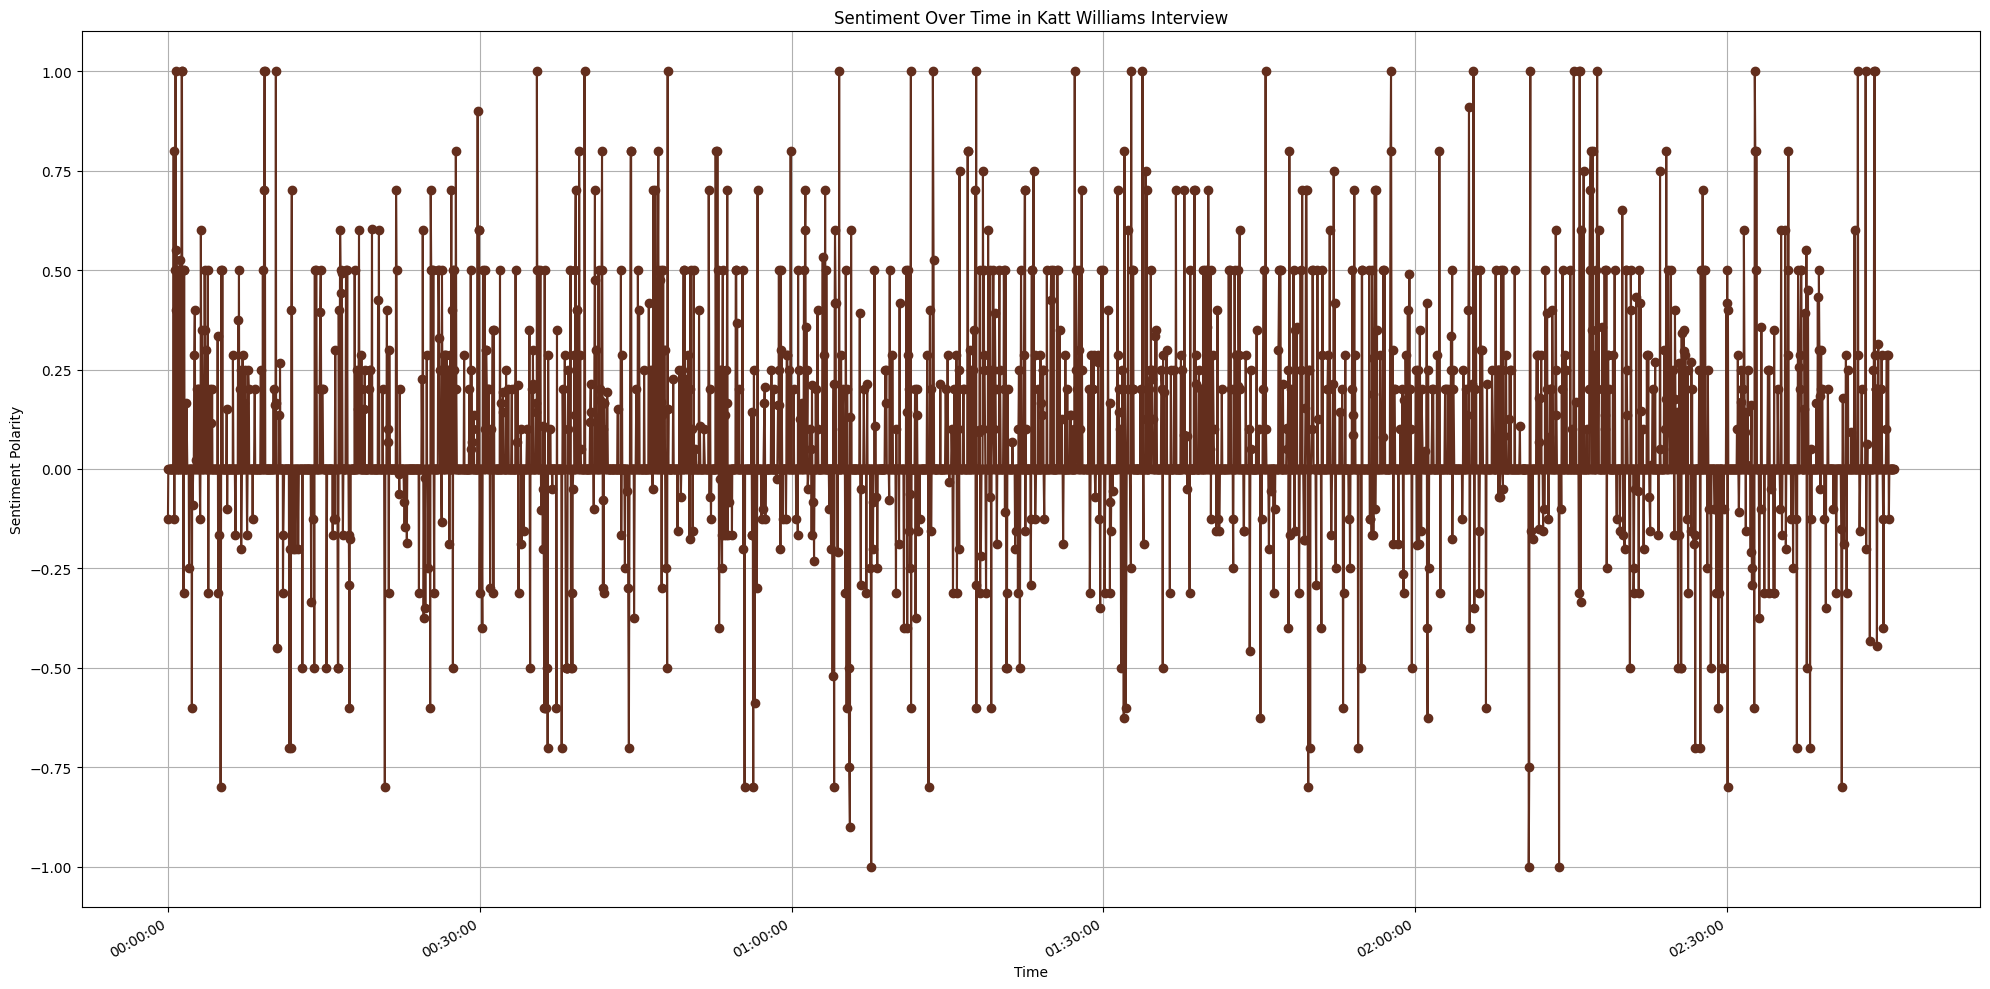

In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'text' column in your DataFrame contains the transcript text
# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply function to calculate sentiment for each row in the DataFrame
df['sentiment'] = df['text'].apply(calculate_sentiment)

# Assuming 'timestamp' is already the index of the DataFrame and is in datetime format
# Create a time series plot of sentiment over time
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Plot the sentiment
plt.plot(df.index, df['sentiment'], marker='o', linestyle='-', color=dark_color)

# Formatting the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate the labels on the x-axis for better readability
plt.gcf().autofmt_xdate()

# Title and labels
plt.title('Sentiment Over Time in Katt Williams Interview')
plt.xlabel('Time')
plt.ylabel('Sentiment Polarity')

# Show a grid for easier reading of the plot
plt.grid(True)

# Tighten the layout and show the plot
plt.tight_layout()
plt.show()